In [3]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import Required Packages
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import io
import pandas as pd
import pandas_datareader.data as web
import pandas.plotting
from pandas.plotting import register_matplotlib_converters
import pandas.testing #pandas.testing.assert_frame_equal
from pandas.testing import assert_frame_equal #assert_frame_equal

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style

import mplfinance as mpf
import mpl_finance as mplf
from mpl_finance import candlestick_ohlc

import collections
from collections import Counter

import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-03-25  645.500000  609.500000  613.000000  640.390015  39224900.0   
2021-03-26  643.820007  599.890015  641.869995  618.710022  33778400.0   
2021-03-29  616.479980  596.020020  615.640015  611.289978  28637000.0   
2021-03-30  637.659973  591.010010  601.750000  635.619995  39432400.0   
2021-03-31  672.000000  641.109985  646.619995  667.929993  33337300.0   
2021-04-01  692.419983  659.419983  688.369995  661.750000  35206300.0   
2021-04-05  708.159973  684.700012  707.710022  691.049988  41842800.0   
2021-04-06  696.549988  681.369995  690.299988  691.619995  28271800.0   
2021-04-07  691.380005  667.840027  687.000000  670.969971  26309400.0   
2021-04-08  689.549988  671.650024  677.380005  683.799988  23842600.0   

             Adj Close  
Date                    
2021-03-25  640.390015  
2021-03-26  618.710022  
2021-03-29 

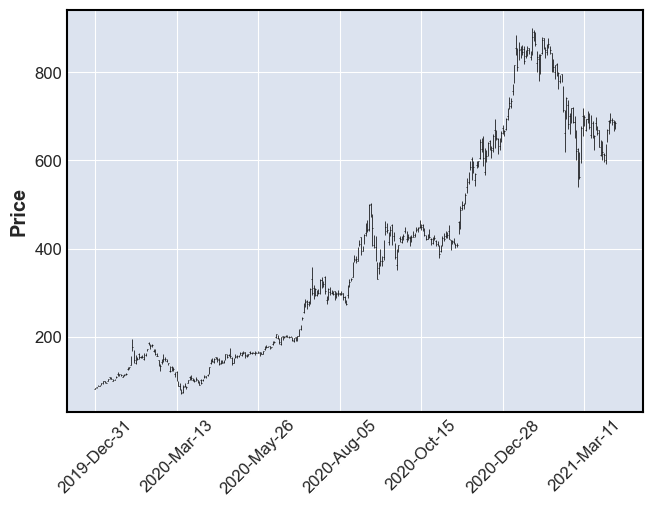

In [5]:
# Parts 1-3: How to Get & Use Stock Market Data

# Here we are using Tesla (ticker = TSLA) as an example.
#df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')

print(df.tail(10))

daily = pd.read_csv('tsla.csv', index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

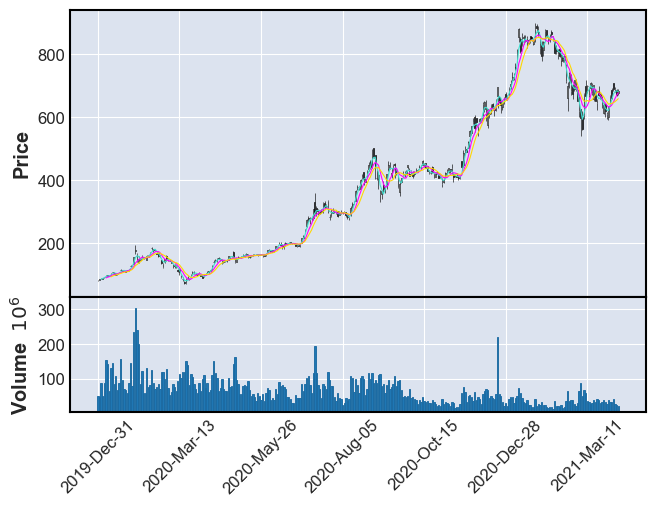

In [6]:
#Candlestick Chart with 3, 6, 9 Moving Averages, Subplot Showing Volume Bar Chart
mpf.plot(daily, type='candle', mav = (3, 6, 9), volume = True)

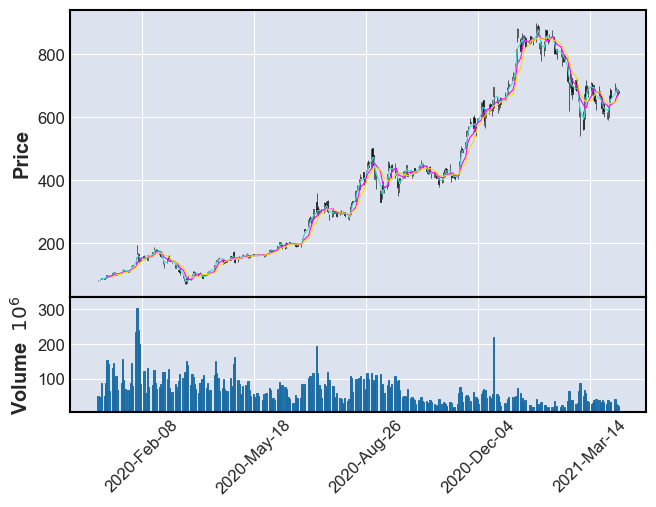

In [7]:
# Subplot Showing Volume Bar Chart
mpf.plot(daily, type = 'candle', mav =(3, 6, 9), volume = True, show_nontrading = True)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-03-25  236.940002  231.570007  235.300003  232.339996  34061900.0   
2021-03-26  236.710007  231.550003  231.550003  236.479996  25471700.0   
2021-03-29  236.800003  231.880005  236.589996  235.240005  25227500.0   
2021-03-30  233.850006  231.100006  233.529999  231.850006  24792000.0   
2021-03-31  239.100006  232.389999  232.910004  235.770004  43623500.0   
2021-04-01  242.839996  238.050003  238.470001  242.350006  30312000.0   
2021-04-05  249.960007  242.699997  242.759995  249.070007  36910600.0   
2021-04-06  249.399994  246.880005  247.610001  247.860001  22931900.0   
2021-04-07  250.929993  247.190002  247.809998  249.899994  22719800.0   
2021-04-08  254.139999  252.000000  252.770004  253.250000  23607200.0   

             Adj Close  
Date                    
2021-03-25  232.339996  
2021-03-26  236.479996  
2021-03-29 

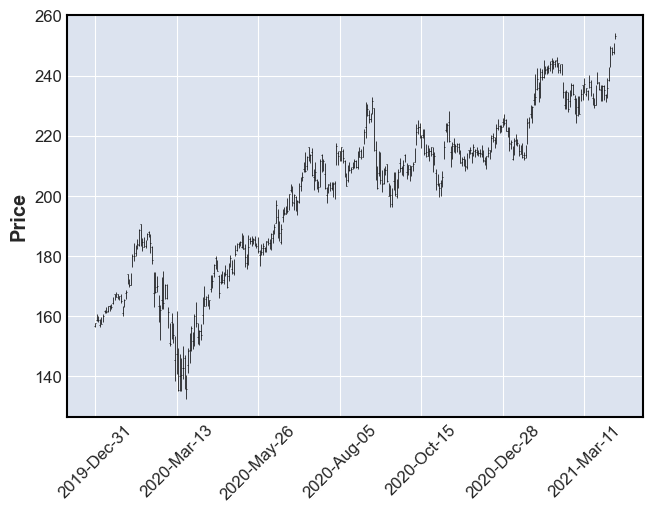

In [8]:
#Bar Chart for Microsoft (ticker = MSFT)
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('MSFT', 'yahoo', start, end)
df.to_csv('msft.csv')

print(df.tail(10))

daily = pd.read_csv('msft.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

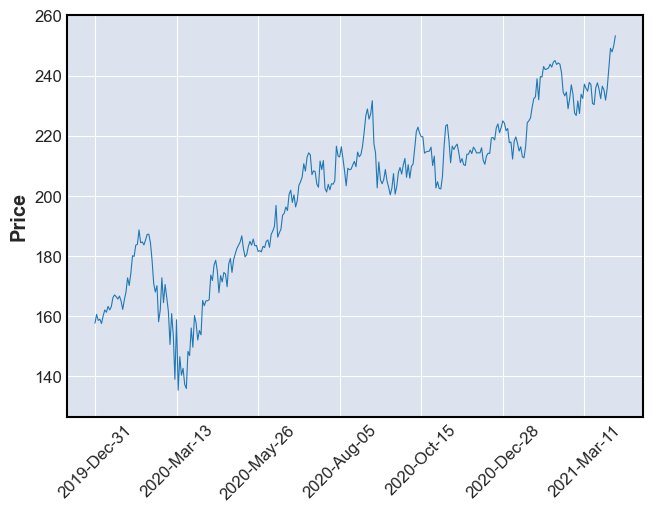

In [9]:
#Line Graph
mpf.plot(daily, type='line')

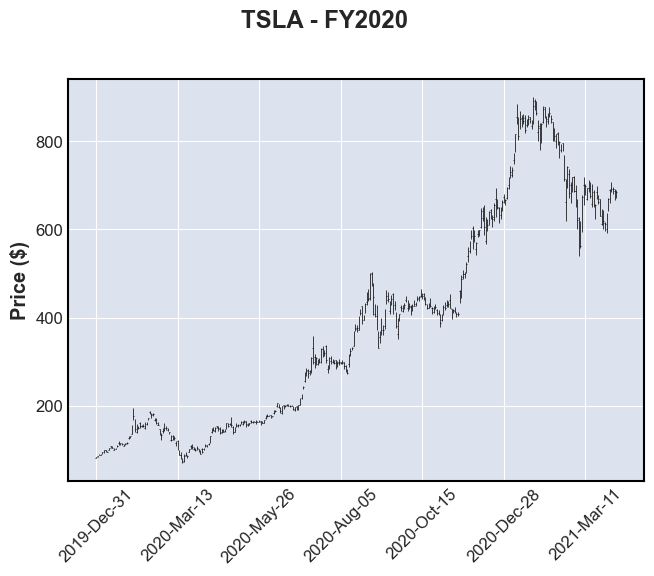

In [10]:
datafile = 'tsla.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Convert dates from string to datetime format
data.index = pd.to_datetime(data.index)
data

mpf.plot(
    data,
    title = 'TSLA - FY2020',
    ylabel = 'Price ($)')

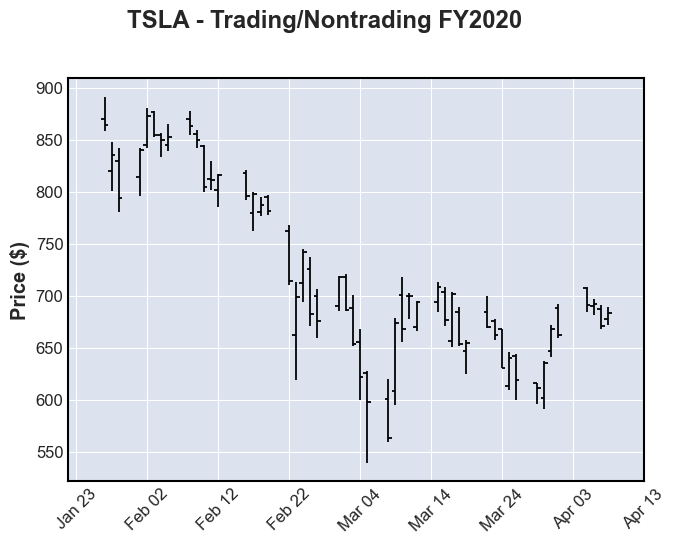

In [11]:

mpf.plot(
    data[-50:],
    title = 'TSLA - Trading/Nontrading FY2020',
    ylabel = 'Price ($)',
    show_nontrading = True)
plt.show()

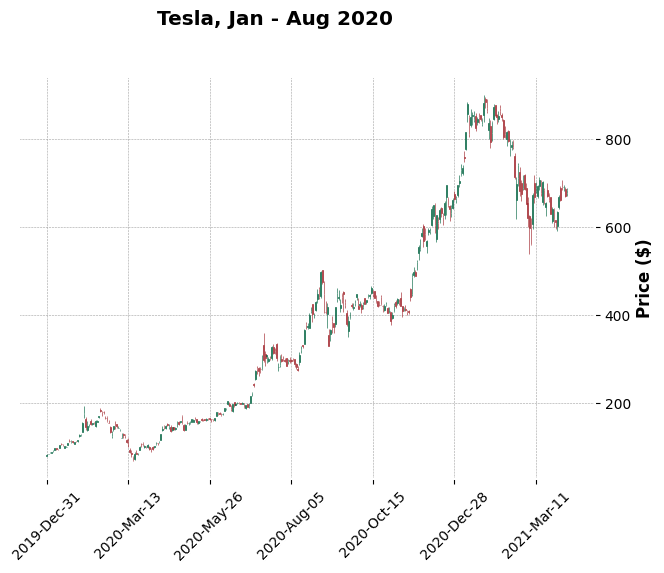

In [12]:
mpf.plot(
    data,
    #data[-50:],
    type ='candle',
    style = 'charles',
    title = 'Tesla, Jan - Aug 2020',
    ylabel = 'Price ($)',
    #show_nontrading = True
)
#    data[-50:], type='candlestick', show_nontrading = True)

In [13]:

df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')

df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-04-01  692.419983  659.419983  688.369995  661.750000  35206300.0   
2021-04-05  708.159973  684.700012  707.710022  691.049988  41842800.0   
2021-04-06  696.549988  681.369995  690.299988  691.619995  28271800.0   
2021-04-07  691.380005  667.840027  687.000000  670.969971  26309400.0   
2021-04-08  689.549988  671.650024  677.380005  683.799988  23842600.0   

             Adj Close       100ma  
Date                                
2021-04-01  661.750000  682.888699  
2021-04-05  691.049988  685.499698  
2021-04-06  691.619995  688.203298  
2021-04-07  670.969971  690.809398  
2021-04-08  683.799988  693.476098  


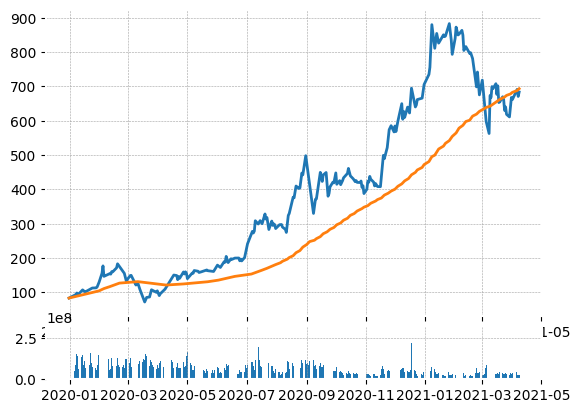

In [14]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [15]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)
print(df_ohlc.head())

        Date        open        high         low       close
0 2019-12-31   83.666000   98.428001   83.666000   96.267998
1 2020-01-10   95.629997  107.584000   95.629997  102.099998
2 2020-01-20  109.440002  116.197998  109.440002  116.197998
3 2020-01-30  128.162003  177.412003  128.162003  149.613998
4 2020-02-09  154.255997  171.679993  153.457993  171.679993


In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

      Date        open        high         low       close
0  18261.0   83.666000   98.428001   83.666000   96.267998
1  18271.0   95.629997  107.584000   95.629997  102.099998
2  18281.0  109.440002  116.197998  109.440002  116.197998
3  18291.0  128.162003  177.412003  128.162003  149.613998
4  18301.0  154.255997  171.679993  153.457993  171.679993


In [17]:
df_ohlc.head()

,Date,open,high,low,close
0,18261.0,83.666000,98.428001,83.666000,96.267998
1,18271.0,95.629997,107.584000,95.629997,102.099998
2,18281.0,109.440002,116.197998,109.440002,116.197998
3,18291.0,128.162003,177.412003,128.162003,149.613998
4,18301.0,154.255997,171.679993,153.457993,171.679993


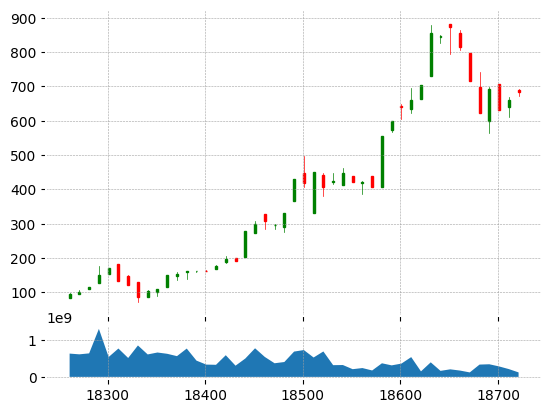

In [18]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

#mplfinance.plot(ax1, df_ohlc.values, width = 2, colorup = 'g')
# only takes one positional argument??
candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [19]:

# Part 4: Resampling the Data for improved accuracy
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.tail(10))

df_ohlc = df['Adj Close'].resample('10D').mean()

# Resample data for 10 day period
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)

# Convert datetime object to mdate
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-03-25  645.500000  609.500000  613.000000  640.390015  39224900.0   
2021-03-26  643.820007  599.890015  641.869995  618.710022  33778400.0   
2021-03-29  616.479980  596.020020  615.640015  611.289978  28637000.0   
2021-03-30  637.659973  591.010010  601.750000  635.619995  39432400.0   
2021-03-31  672.000000  641.109985  646.619995  667.929993  33337300.0   
2021-04-01  692.419983  659.419983  688.369995  661.750000  35206300.0   
2021-04-05  708.159973  684.700012  707.710022  691.049988  41842800.0   
2021-04-06  696.549988  681.369995  690.299988  691.619995  28271800.0   
2021-04-07  691.380005  667.840027  687.000000  670.969971  26309400.0   
2021-04-08  689.549988  671.650024  677.380005  683.799988  23842600.0   

             Adj Close       100ma  
Date                                
2021-03-25  640.390015  671.650899  


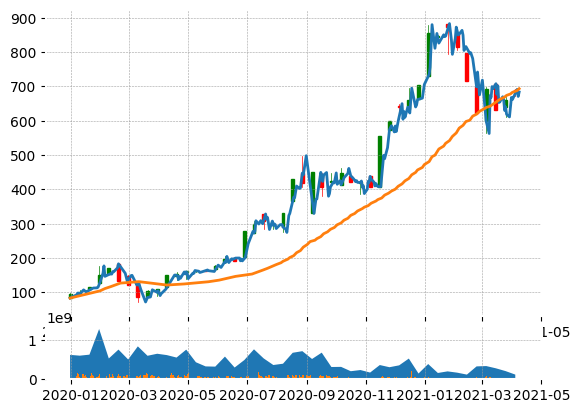

In [20]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 3, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
                 
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [21]:
# Part 5: Getting S&P500 List
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL'

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'COP

In [22]:

# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2020,5,28)

    # Grab all ticker data
    for ticker in tickers:
        print(ticker)    
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Already have AOS
APA
Already have APA
AAPL
Already have AAPL
AMAT
A

Already have PG
PGR
Already have PGR
PLD
Already have PLD
PRU
Already have PRU
PEG
Already have PEG
PSA
Already have PSA
PHM
Already have PHM
PVH
Already have PVH
QRVO
Already have QRVO
PWR
Already have PWR
QCOM
Already have QCOM
DGX
Already have DGX
RL
Already have RL
RJF
Already have RJF
RTX
Already have RTX
O
Already have O
REG
Already have REG
REGN
Already have REGN
RF
Already have RF
RSG
Already have RSG
RMD
Already have RMD
RHI
Already have RHI
ROK
Already have ROK
ROL
Already have ROL
ROP
Already have ROP
ROST
Already have ROST
RCL
Already have RCL
SPGI
Already have SPGI
CRM
Already have CRM
SBAC
Already have SBAC
SLB
Already have SLB
STX
Already have STX
SEE
Already have SEE
SRE
Already have SRE
NOW
Already have NOW
SHW
Already have SHW
SPG
Already have SPG
SWKS
Already have SWKS
SNA
Already have SNA
SO
Already have SO
LUV
Already have LUV
SWK
Already have SWK
SBUX
Already have SBUX
STT
Already have STT
STE
Already have STE
SYK
Already have SYK
SIVB
Already have SIVB
SYF
Alread

In [29]:
# Part 7: Combine S&P500 List with Adjusted Close Price for All Companies
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    mainDataSet = pd.DataFrame()

# Count in SP500 tickers list
    for count, ticker in enumerate(tickers):
        fileDataSet = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        fileDataSet.set_index('Date', inplace = True)
        fileDataSet.rename(columns = {'Adj Close':ticker}, inplace = True)
        fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)

        if mainDataSet.empty:
            mainDataSet = fileDataSet
        else:
            mainDataSet = mainDataSet.join(fileDataSet)
        print(mainDataSet.head())
    #mainDataSet.to_csv('sp500_joined_closes.csv')
compile_data()

mainDataSet.to_csv('sp500joined.csv')

                  MMM
Date                 
1999-12-31  28.611694
2000-01-03  27.588531
2000-01-04  26.492285
2000-01-05  27.259663
2000-01-06  29.452133
                  MMM       ABT
Date                           
1999-12-31  28.611694  9.199702
2000-01-03  27.588531  8.867177
2000-01-04  26.492285  8.613833
2000-01-05  27.259663  8.597999
2000-01-06  29.452133  8.898850
                  MMM       ABT  ABBV
Date                                 
1999-12-31  28.611694  9.199702   NaN
2000-01-03  27.588531  8.867177   NaN
2000-01-04  26.492285  8.613833   NaN
2000-01-05  27.259663  8.597999   NaN
2000-01-06  29.452133  8.898850   NaN
                  MMM       ABT  ABBV      ABMD
Date                                           
1999-12-31  28.611694  9.199702   NaN  18.37500
2000-01-03  27.588531  8.867177   NaN  18.25000
2000-01-04  26.492285  8.613833   NaN  17.81250
2000-01-05  27.259663  8.597999   NaN  18.00000
2000-01-06  29.452133  8.898850   NaN  18.03125
                  MM

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
1999-12-31  28.611694  9.199702   NaN  18.37500  NaN  1.143540  16.693562   
2000-01-03  27.588531  8.867177   NaN  18.25000  NaN  1.227555  16.274673   
2000-01-04  26.492285  8.613833   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.259663  8.597999   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  29.452133  8.898850   NaN  18.03125  NaN  1.171544  15.328290   

                 AMD  AAP        AES       AFL          A        APD     AKAM  \
Date                                                                            
1999-12-31  14.46875  NaN  28.826557  7.843440  47.743359  18.945976  327.625   
2000-01-03  15.50000  NaN  27.958862  7.438281  44.462685  18.522602  321.250   
2000-01-04  14.62500  NaN  26.850151  7.240898  41.066238  17.958101  300.000   
2000-01-05  15.00000  NaN  27.139378  7.199343  38.5189

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
1999-12-31  28.611694  9.199702   NaN  18.37500  NaN  1.143540  16.693562   
2000-01-03  27.588531  8.867177   NaN  18.25000  NaN  1.227555  16.274673   
2000-01-04  26.492285  8.613833   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.259663  8.597999   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  29.452133  8.898850   NaN  18.03125  NaN  1.171544  15.328290   

                 AMD  AAP        AES  ...  ALGN  ALLE       LNT        ALL  \
Date                                  ...                                    
1999-12-31  14.46875  NaN  28.826557  ...   NaN   NaN  5.463532  14.402368   
2000-01-03  15.50000  NaN  27.958862  ...   NaN   NaN  5.326941  14.065693   
2000-01-04  14.62500  NaN  26.850151  ...   NaN   NaN  5.326941  13.616785   
2000-01-05  15.00000  NaN  27.139378  ...   NaN   NaN  5.587701  14.21

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
1999-12-31  28.611694  9.199702   NaN  18.37500  NaN  1.143540  16.693562   
2000-01-03  27.588531  8.867177   NaN  18.25000  NaN  1.227555  16.274673   
2000-01-04  26.492285  8.613833   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.259663  8.597999   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  29.452133  8.898850   NaN  18.03125  NaN  1.171544  15.328290   

                 AMD  AAP        AES  ...  AMCR        AEE  AAL        AEP  \
Date                                  ...                                    
1999-12-31  14.46875  NaN  28.826557  ...   NaN  11.871629  NaN  12.424023   
2000-01-03  15.50000  NaN  27.958862  ...   NaN  11.713037  NaN  12.158134   
2000-01-04  14.62500  NaN  26.850151  ...   NaN  11.713037  NaN  12.303166   
2000-01-05  15.00000  NaN  27.139378  ...   NaN  12.166157  NaN  12.76

[5 rows x 42 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
1999-12-31  28.611694  9.199702   NaN  18.37500  NaN  1.143540  16.693562   
2000-01-03  27.588531  8.867177   NaN  18.25000  NaN  1.227555  16.274673   
2000-01-04  26.492285  8.613833   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.259663  8.597999   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  29.452133  8.898850   NaN  18.03125  NaN  1.171544  15.328290   

                 AMD  AAP        AES  ...  AWK  AMP       ABC       AME  \
Date                                  ...                                 
1999-12-31  14.46875  NaN  28.826557  ...  NaN  NaN  2.995442  2.408673   
2000-01-03  15.50000  NaN  27.958862  ...  NaN  NaN  3.069404  2.400775   
2000-01-04  14.62500  NaN  26.850151  ...  NaN  NaN  2.859848  2.392877   
2000-01-05  15.00000  NaN  27.139378  ...  NaN  NaN  3.081731  

FileNotFoundError: [Errno 2] No such file or directory: 'stock_dfs/APTV.csv'